# Telco Customer Churn Analysis with ML Algorithms

# The story of the datasets
Telco customer churn data, 7043 California home phone and Internet services provider fictitious in the third quarter.
Contains information about a telecom company. In which industries you have signed up for some or some of the services
shows.

# The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

# Stages of project
- Importing Dataset, Required Library and Functions
- Exploratory Data Analysis

    1. Overview
    2. Analysis of Categorical Variables
    3. Analysis of Numerical Variables
    4. Analysis of Target Variable
    5. Analysis of Correlation
-
- DATA PREPROCESSING

    1. Outliers (Aykırı Değerler)
    2. Missing Values (Eksik Değerler)
    3. Base Model
    4. Feature Extraction (Özellik Çıkarımı)
    5. Encoding (Label Encoding, One-Hot Encoding, Rare Encoding)
-
- Modelling

    1. Test Modelling
    2. Automated Hyperparameter Optimization
    3. Feature Importance
    4. Model Validation   
-
- Report         

## Importing Dataset, Required Library and Functions

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings
import missingno as msno

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from pandas.core.common import SettingWithCopyWarning
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=ConvergenceWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

Customer=pd.read_csv(r"Telco-Customer-Churn.csv")

# Exploratory Data Analysis

1. Overview
2. Analysis of Categorical Variables
3. Analysis of Numerical Variables
4. Analysis of Target Variable
5. Analysis of Correlation

# 1. Overview

In [267]:
df=Customer.copy()

In [268]:
def check_df(dataframe, head=5):
    print(f"##################### Shape #####################\n")
    print(dataframe.shape)

    print(f"\n##################### Types #####################\n")
    print(dataframe.dtypes)

    print(f"\n##################### Head #####################\n")
    print(dataframe.head(head))

    print(f"\n##################### Tail #####################\n")
    print(dataframe.tail(head))

    print(f"\n##################### NA #####################\n")
    print(dataframe.isnull().sum())
    
    print(f"\n##################### Total_NA #####################\n")
    print(dataframe.isnull().sum().sum())

    print(f"\n##################### Quantiles #####################\n")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [269]:
check_df(df)

##################### Shape #####################

(7043, 21)

##################### Types #####################

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
                     ...   
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
Length: 21, dtype: object

##################### Head #####################

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No   
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes    

In [270]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
     Note: Categorical variables with numerical appearance are also included in categorical variables.

    Parameters
    ------
        dataframe: dataframe
                The dataframe from which variable names are to be retrieved
        cat_th: int, optional
                Class threshold for numeric but categorical variables
        car_th: int, optinal
                Class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical Variables List
        num_cols: list
                Numeric Variables List
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = Total Number of Variables
        cat_cols includes num_but_cat
        The sum of 3 lists with return is equal to the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """


    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [271]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

In [272]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 2


# 2. Analysis of Categorical Variables

In [273]:
def cat_summary(dataframe, col_name, plot=False):

    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print(f"######################\n")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

        gender  Ratio
Male      3555 50.476
Female    3488 49.524
######################



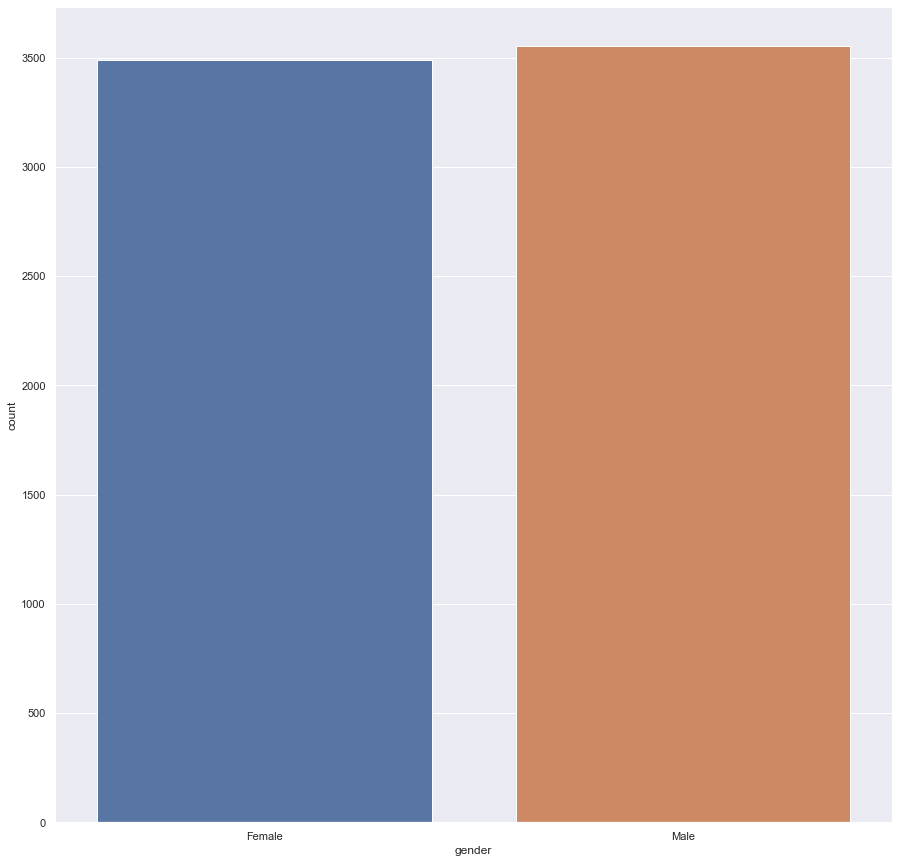

     Partner  Ratio
No      3641 51.697
Yes     3402 48.303
######################



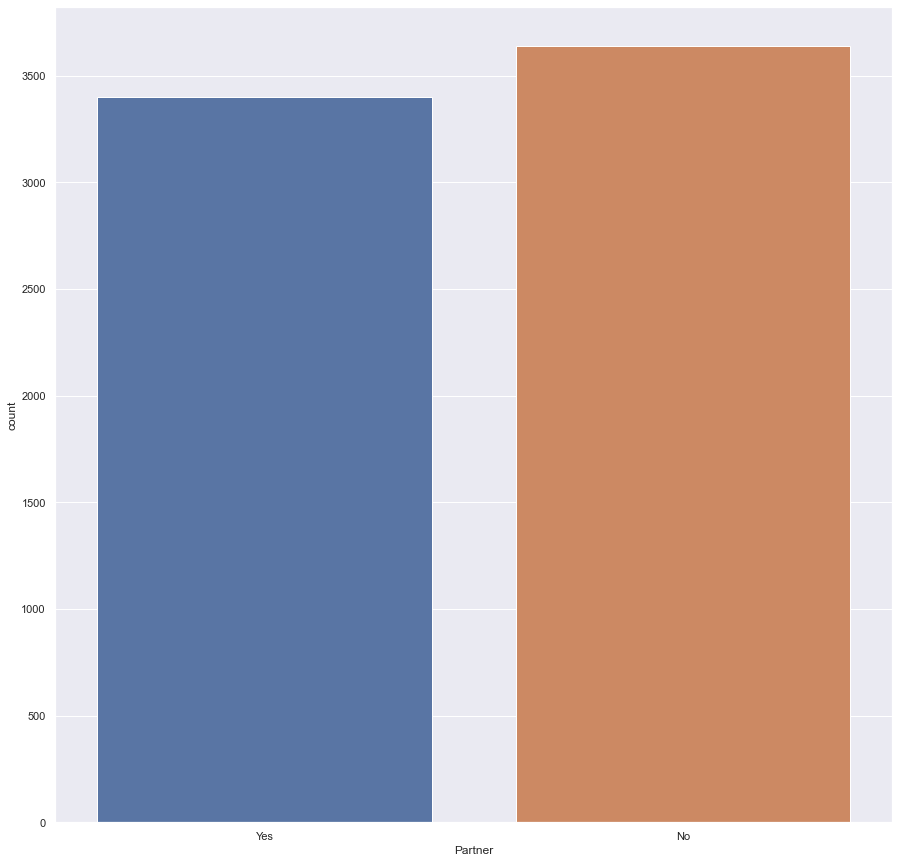

     Dependents  Ratio
No         4933 70.041
Yes        2110 29.959
######################



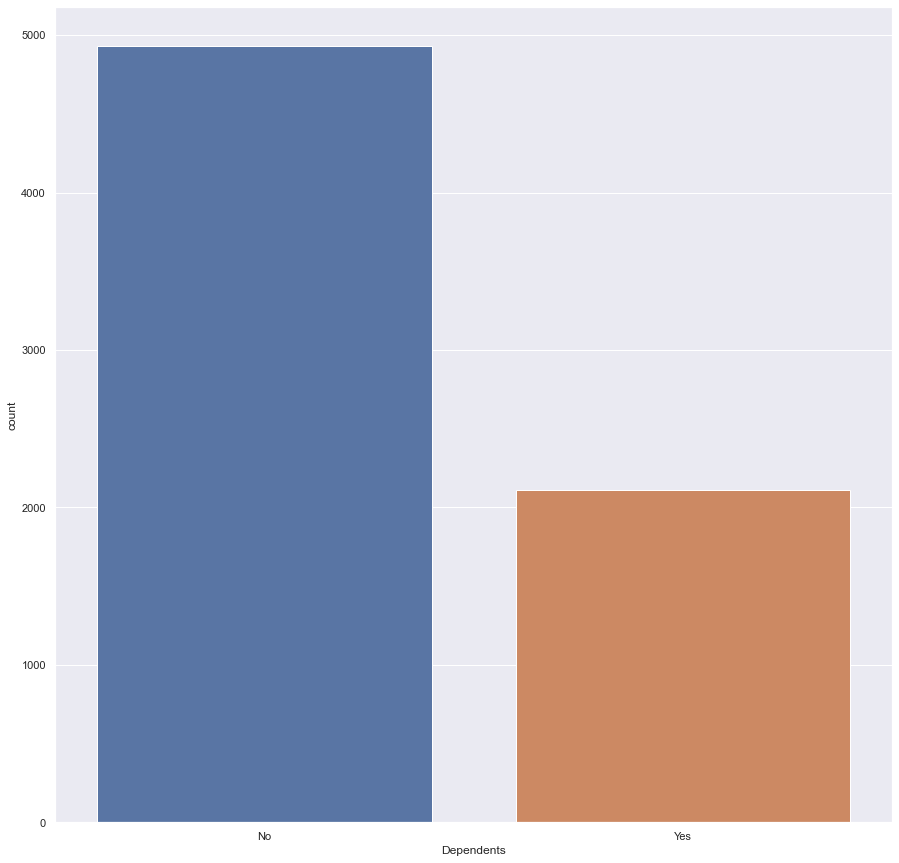

     PhoneService  Ratio
Yes          6361 90.317
No            682  9.683
######################



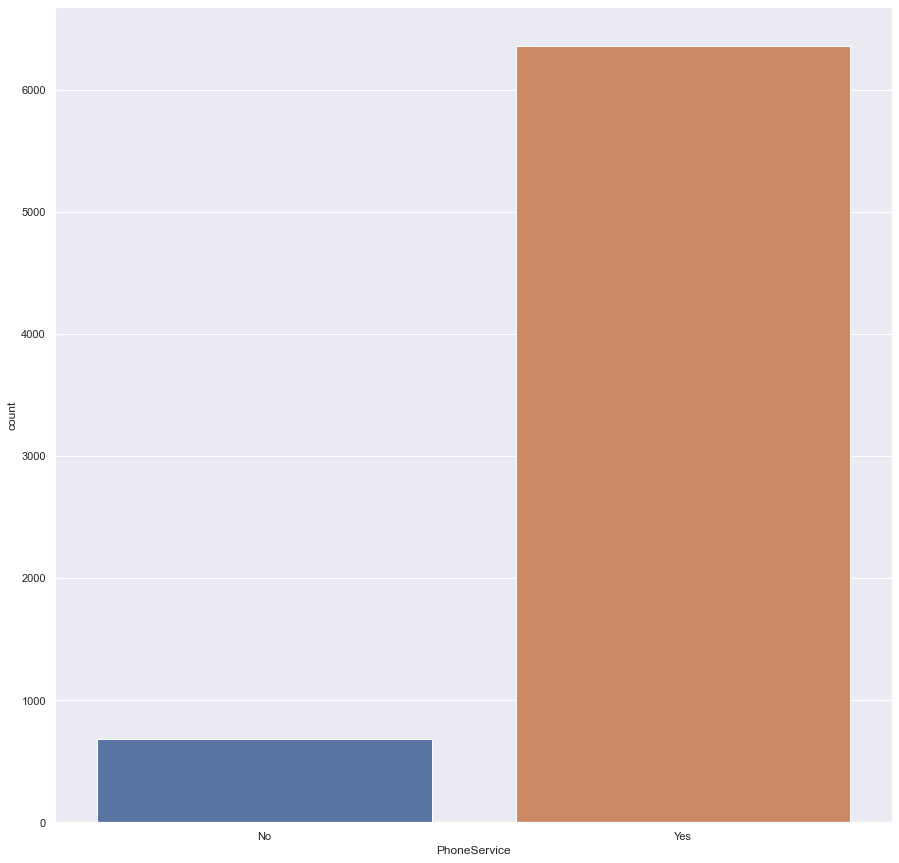

                  MultipleLines  Ratio
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
######################



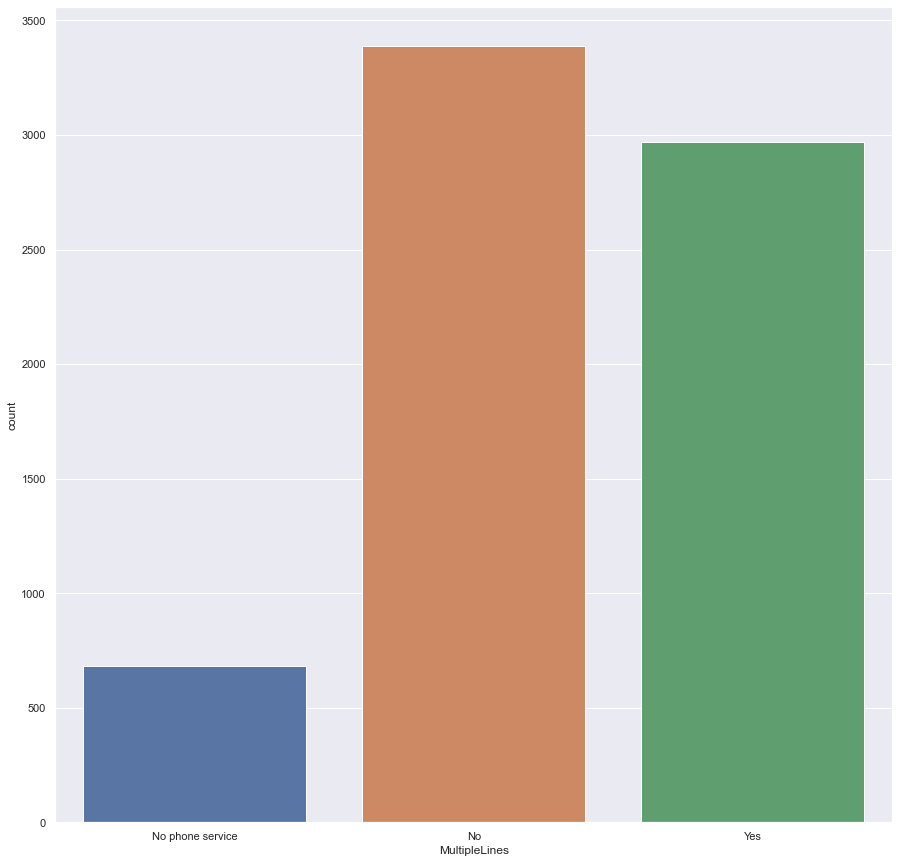

             InternetService  Ratio
Fiber optic             3096 43.959
DSL                     2421 34.375
No                      1526 21.667
######################



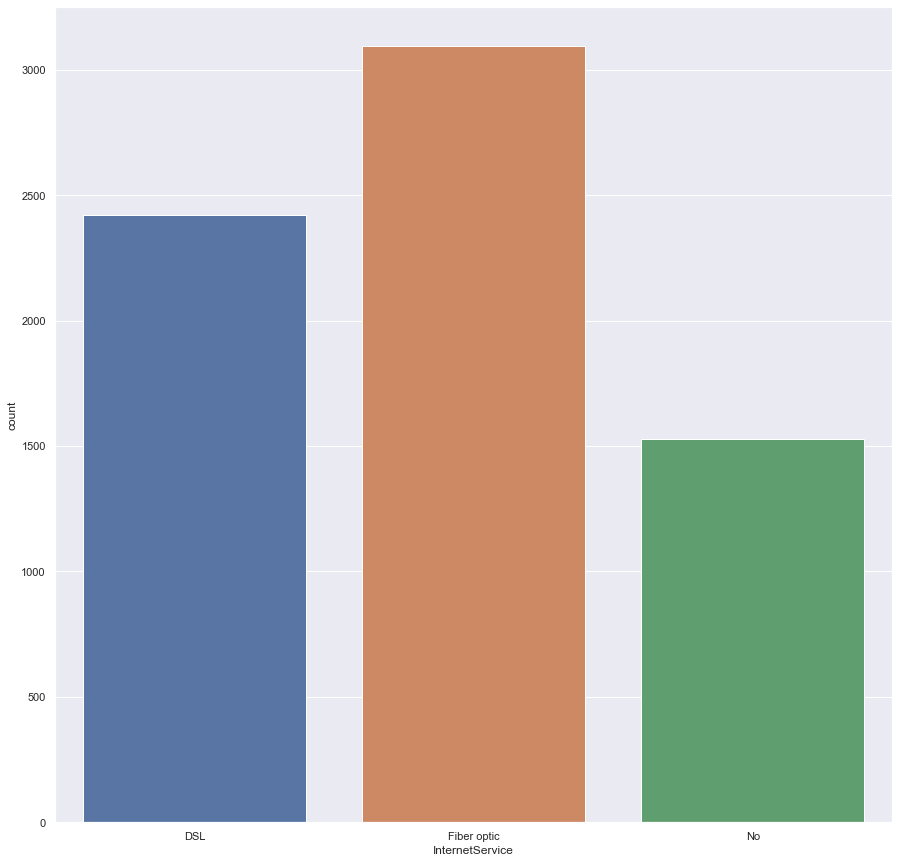

                     OnlineSecurity  Ratio
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667
######################



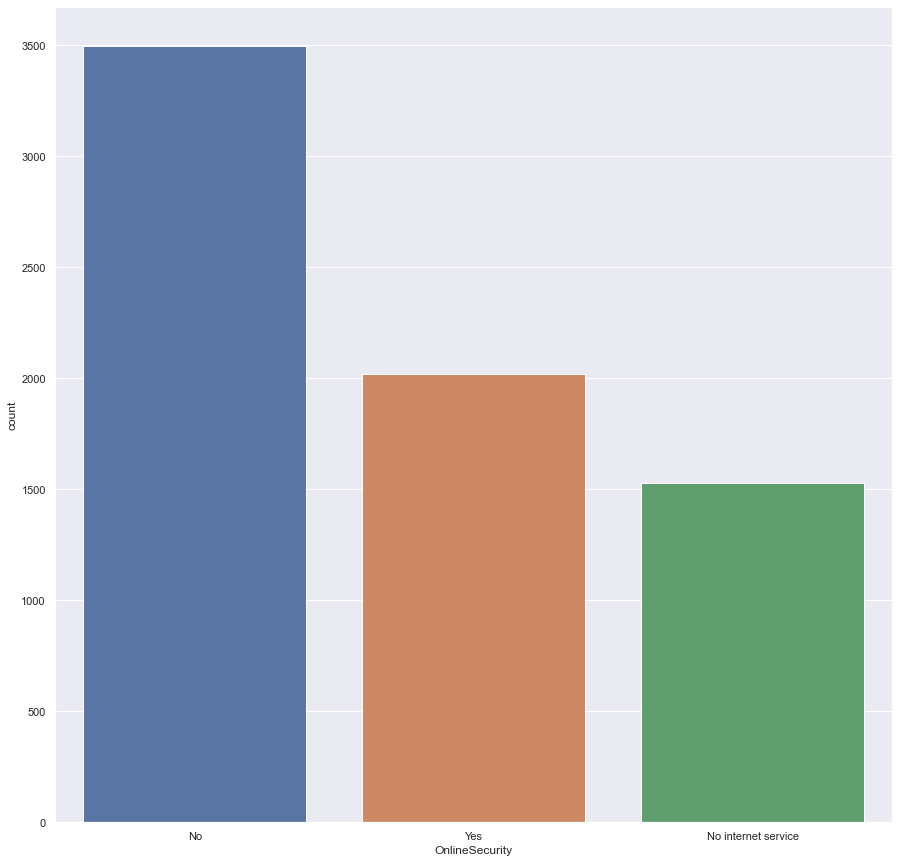

                     OnlineBackup  Ratio
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667
######################



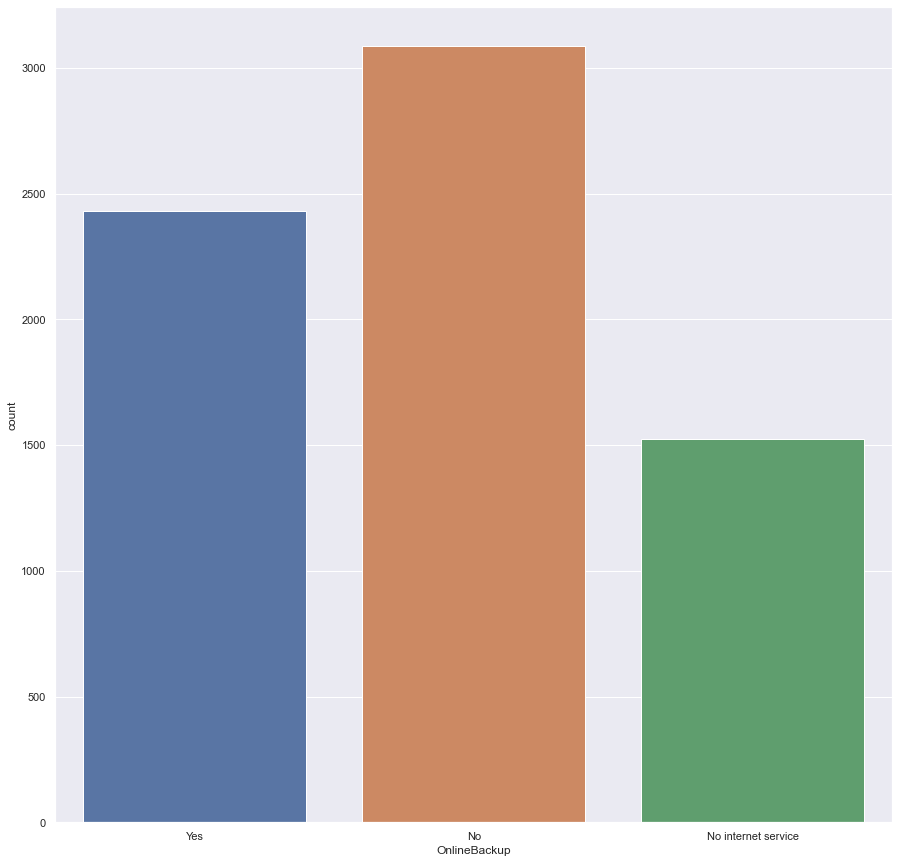

                     DeviceProtection  Ratio
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667
######################



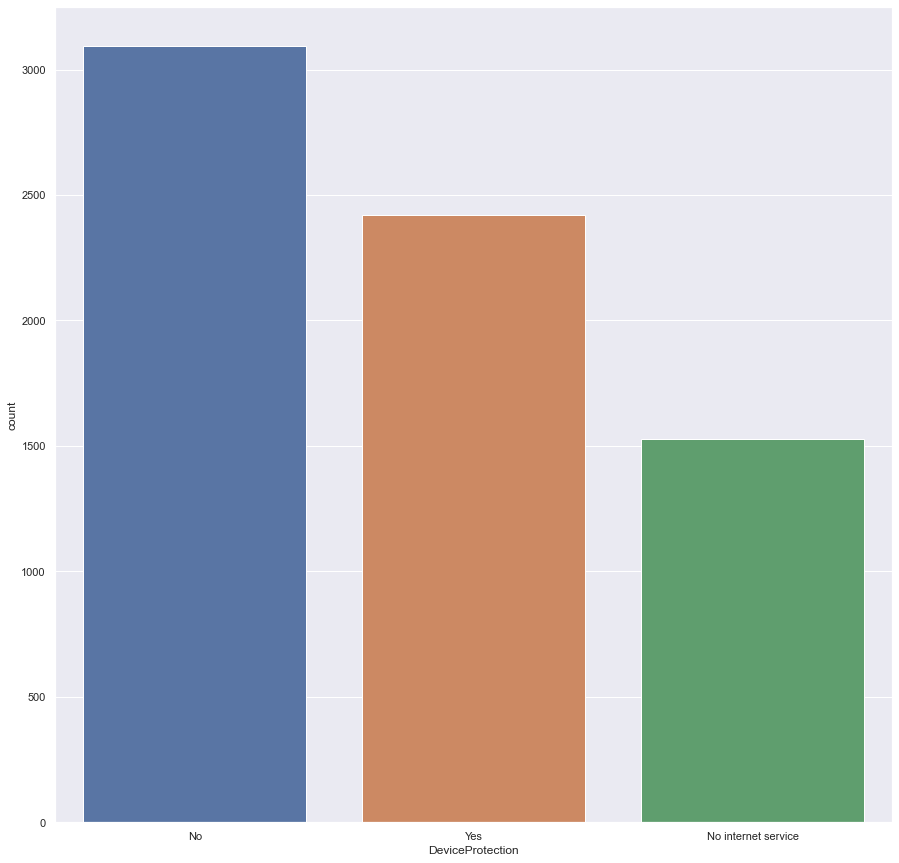

                     TechSupport  Ratio
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667
######################



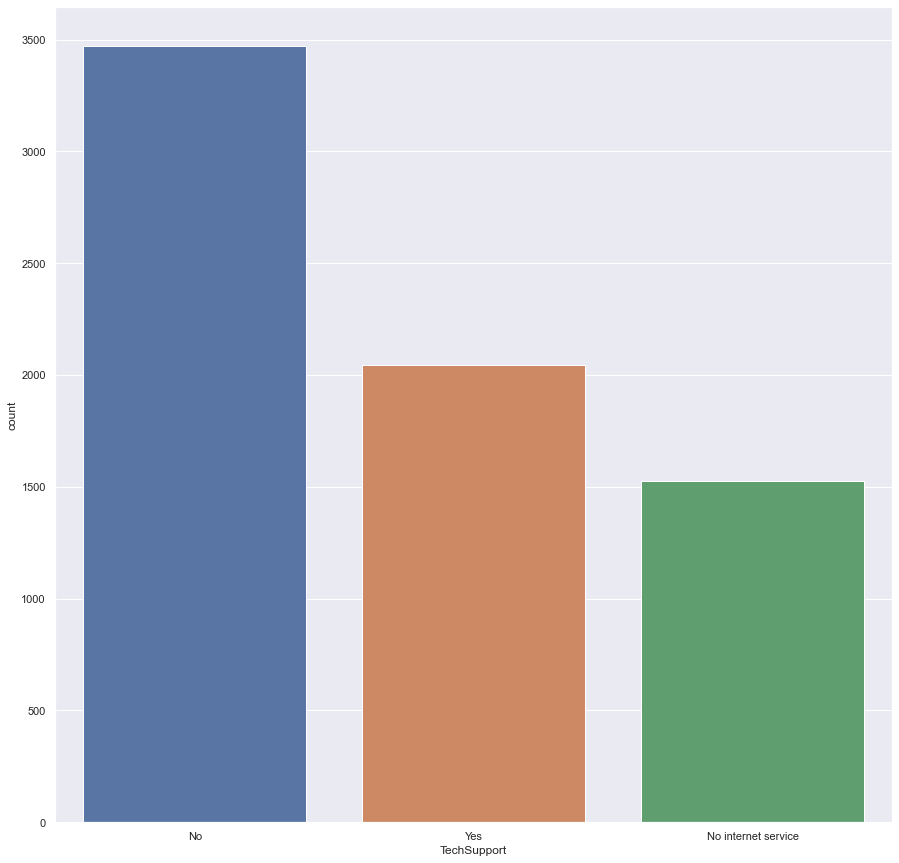

                     StreamingTV  Ratio
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667
######################



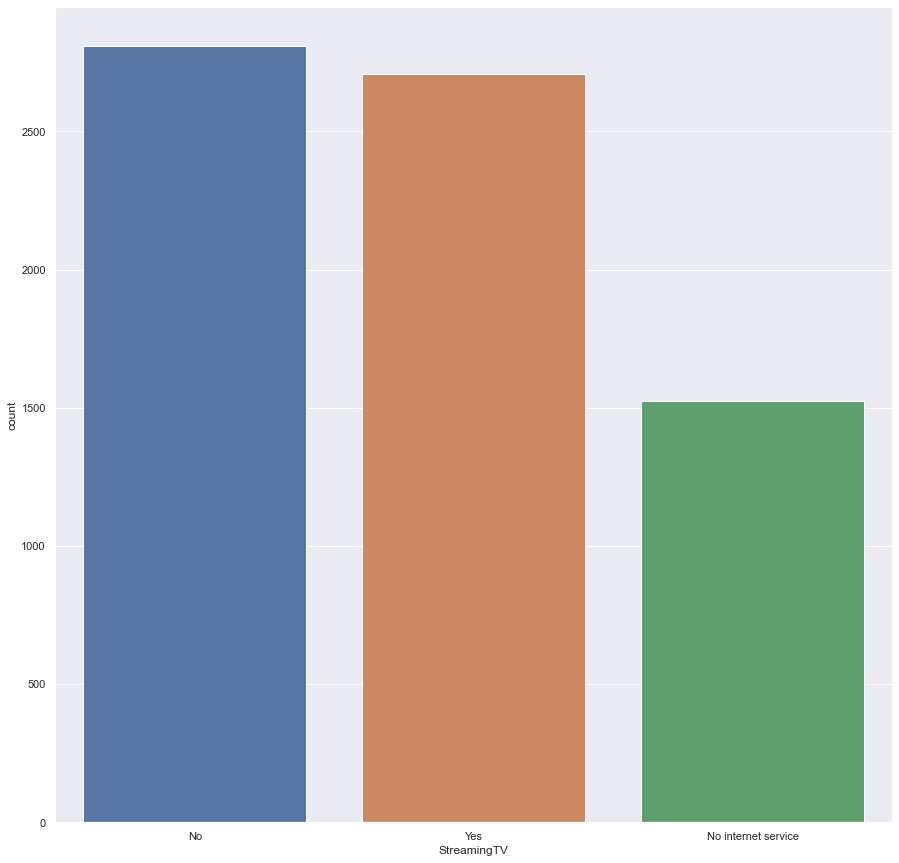

                     StreamingMovies  Ratio
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667
######################



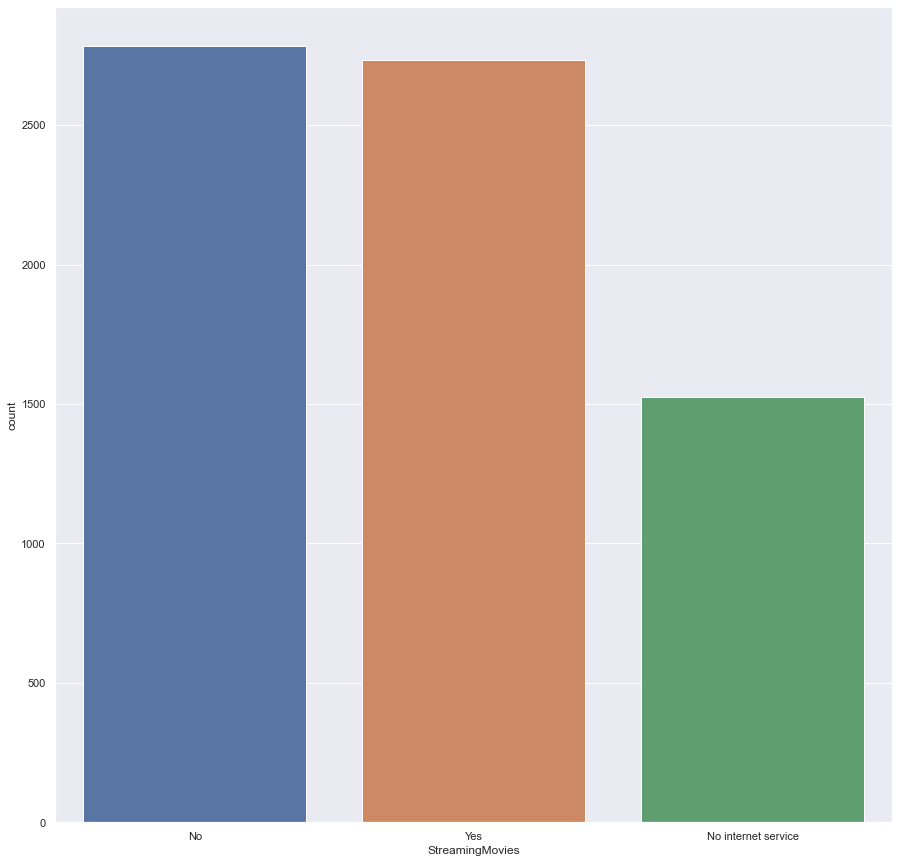

                Contract  Ratio
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
######################



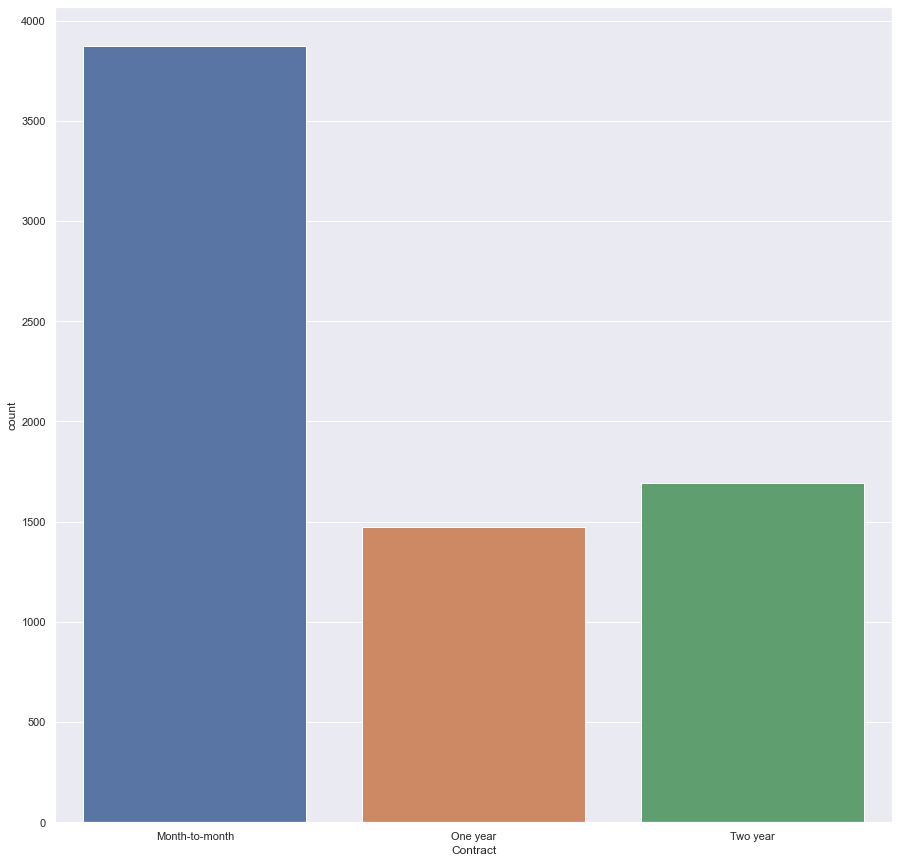

     PaperlessBilling  Ratio
Yes              4171 59.222
No               2872 40.778
######################



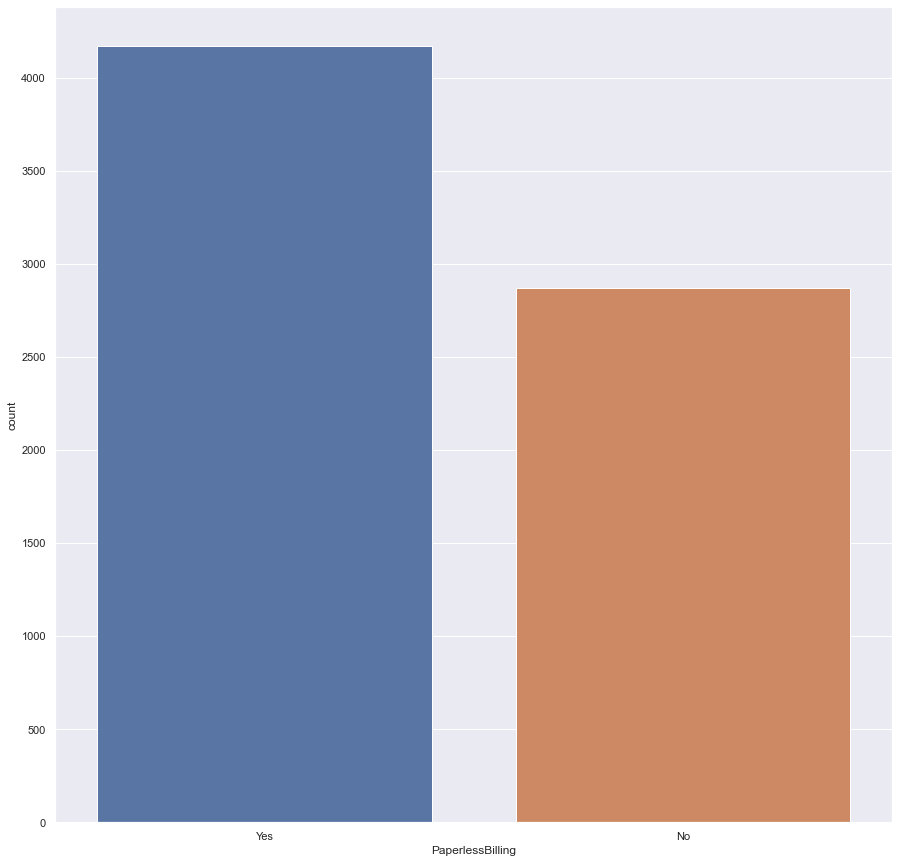

                           PaymentMethod  Ratio
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
######################



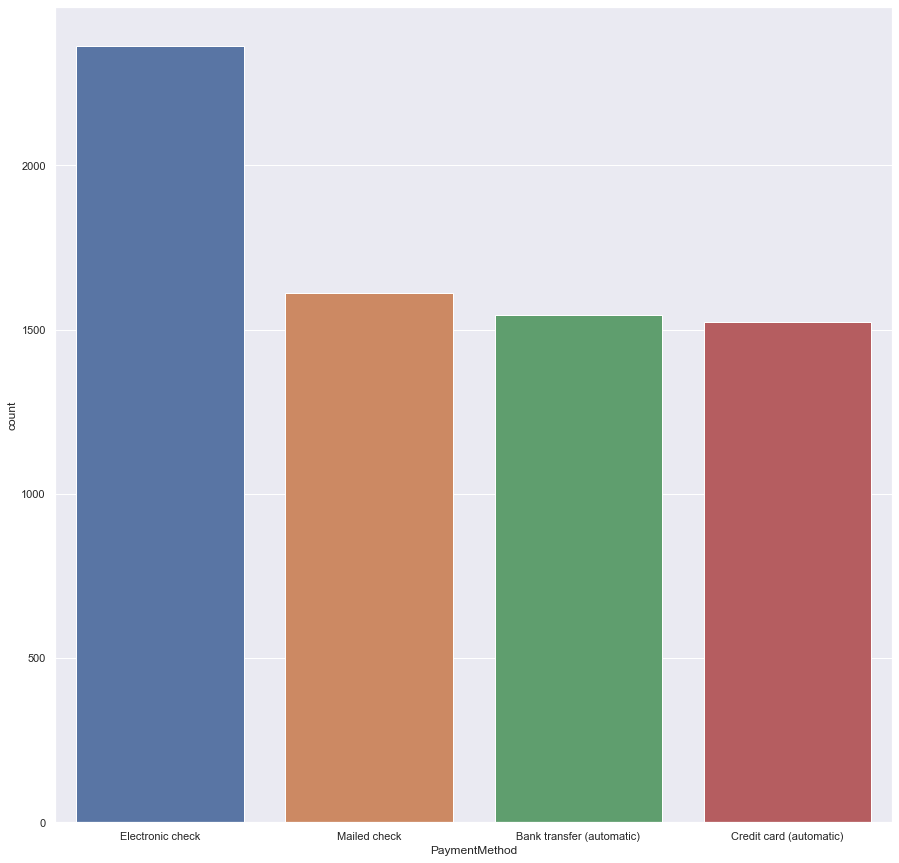

   SeniorCitizen  Ratio
0           5901 83.785
1           1142 16.215
######################



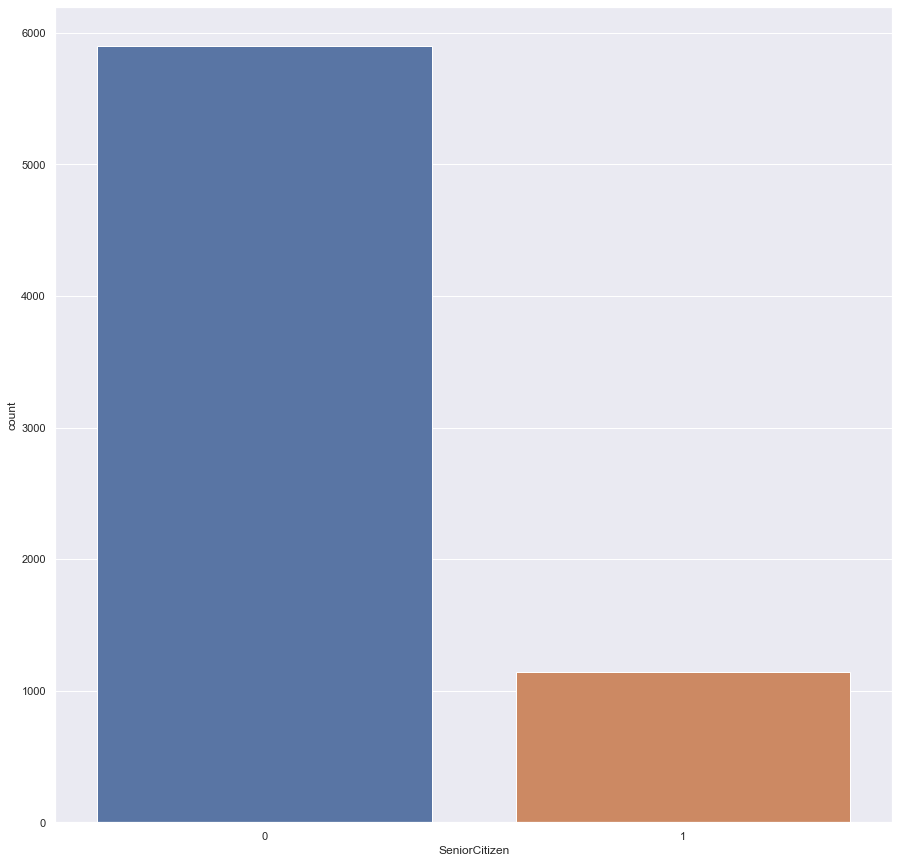

   Churn  Ratio
0   5174 73.463
1   1869 26.537
######################



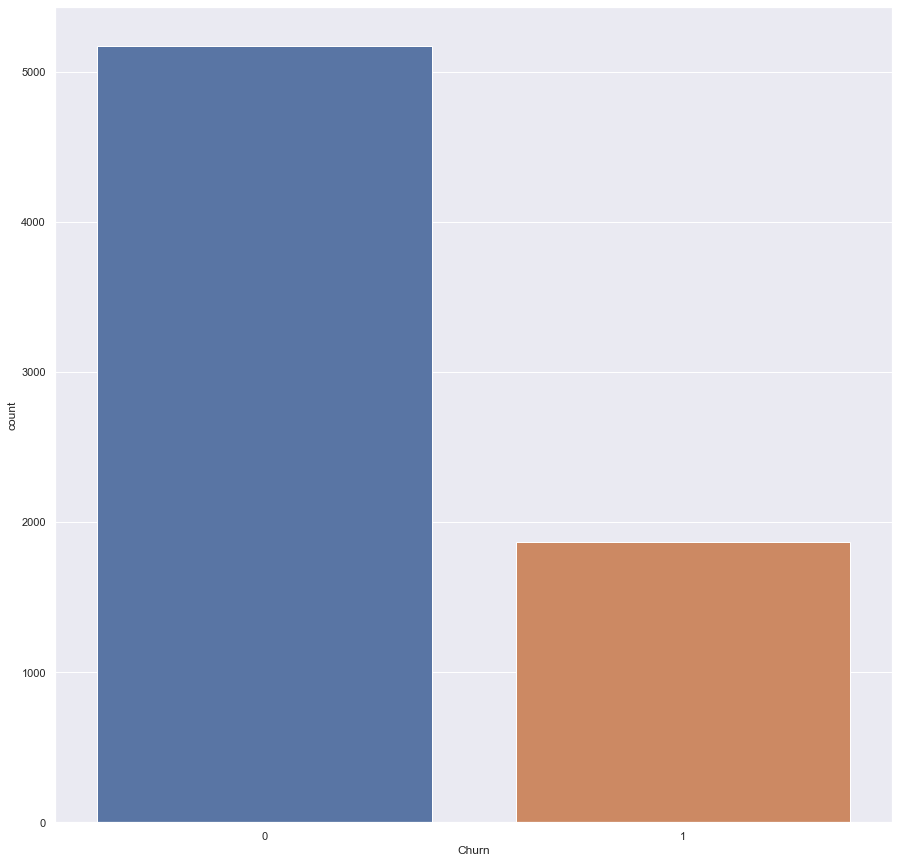

In [274]:
for col in cat_cols:  
    cat_summary(df,col,True)

# 3. Analysis of Numerical Variables

In [275]:
def num_summary(dataframe, numerical_col, plot=False):

    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print("------",numerical_col,"------")
    print(dataframe[numerical_col].describe(quantiles).T)
    

    if plot:
        print(f"\n##### Plot #####\n")
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()
    print("###################################################\n")    

------ tenure ------
count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64

##### Plot #####



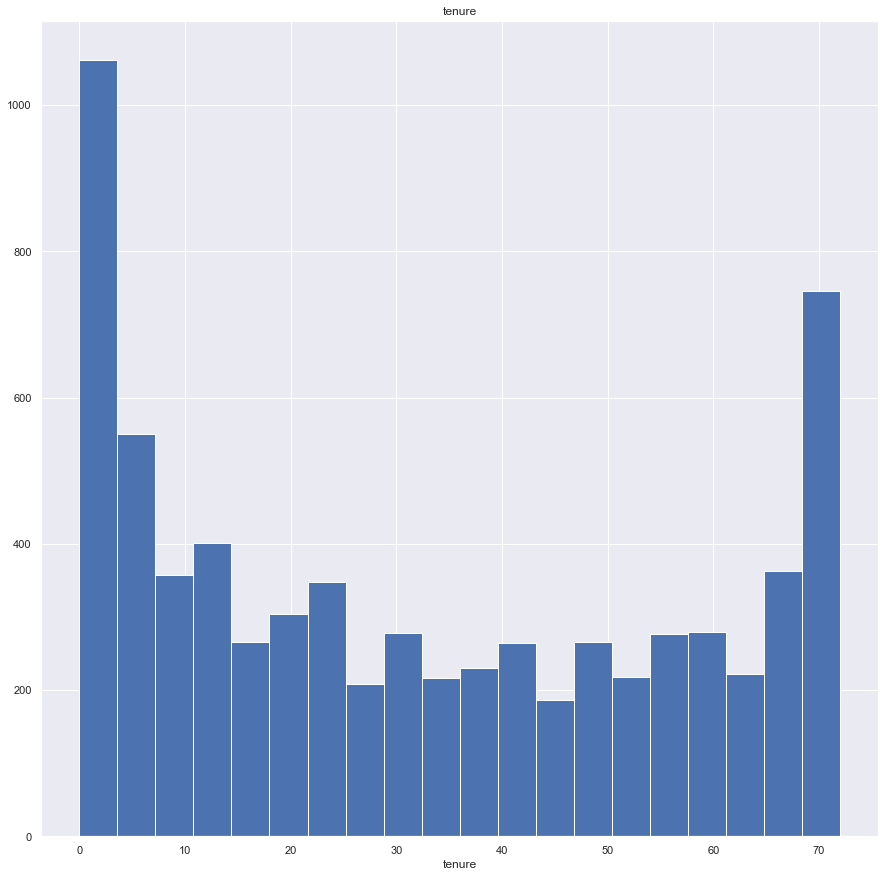

###################################################

------ MonthlyCharges ------
count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64

##### Plot #####



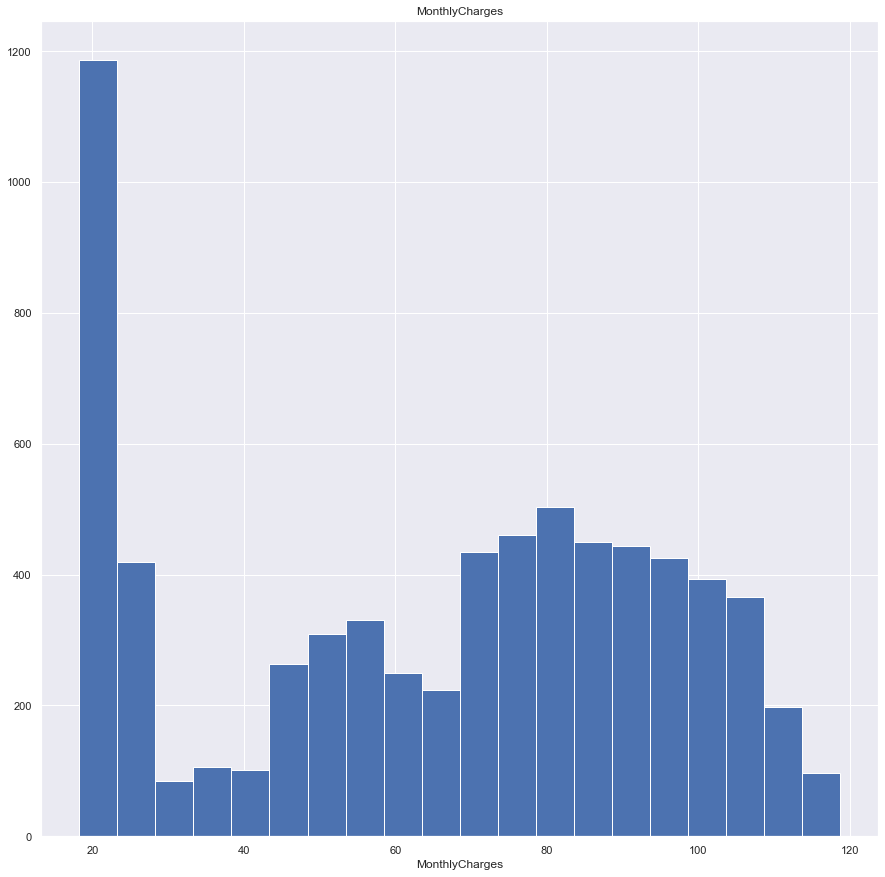

###################################################

------ TotalCharges ------
count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64

##### Plot #####



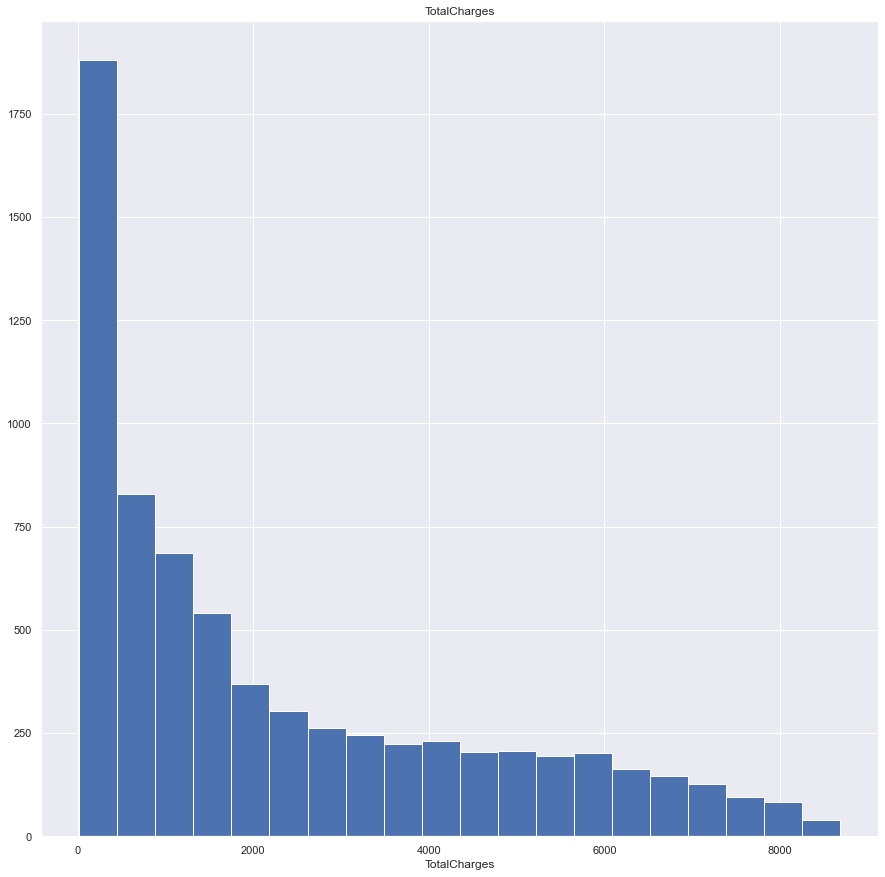

###################################################



In [276]:
for col in num_cols:
    num_summary(df,col,True)

# 4. Analysis of Target Variable

In [277]:
def target_summary_with_cat(dataframe, target, categorical_col):

    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [278]:
for col in cat_cols:
    target_summary_with_cat(df,"Churn",col)

        TARGET_MEAN
gender             
Female        0.269
Male          0.262


         TARGET_MEAN
Partner             
No             0.330
Yes            0.197


            TARGET_MEAN
Dependents             
No                0.313
Yes               0.155


              TARGET_MEAN
PhoneService             
No                  0.249
Yes                 0.267


                  TARGET_MEAN
MultipleLines                
No                      0.250
No phone service        0.249
Yes                     0.286


                 TARGET_MEAN
InternetService             
DSL                    0.190
Fiber optic            0.419
No                     0.074


                     TARGET_MEAN
OnlineSecurity                  
No                         0.418
No internet service        0.074
Yes                        0.146


                     TARGET_MEAN
OnlineBackup                    
No                         0.399
No internet service        0.074
Yes                        0.2

# 5. Analysis of Correlation

In [279]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    
    if plot:
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        plt.figure(figsize=(12, 10))
        ax = sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", annot_kws={"size": 10})
        plt.show()
    return drop_list

C:\Users\Harpyi\AppData\Local\Temp\ipykernel_17744\4019371607.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))


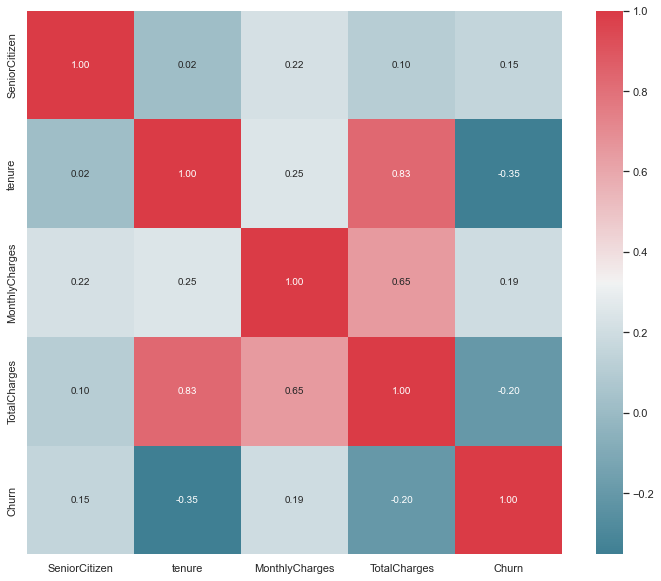

[]

In [280]:
high_correlated_cols(df,True)

# DATA PREPROCESSING


1. Outliers (Aykırı Değerler)
2. Missing Values (Eksik Değerler)
3. Base Model
4. Feature Extraction (Özellik Çıkarımı)
5. Encoding (Label Encoding, One-Hot Encoding, Rare Encoding)

# 1. Outliers

In [281]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [282]:
for col in num_cols:
    print(col,"--->",check_outlier(df,col))

tenure ---> False
MonthlyCharges ---> False
TotalCharges ---> False


In [283]:
# no outliers

# 2. Missing Values

In [284]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

In [285]:
missing_values_table(df)

              n_miss  ratio
TotalCharges      11  0.160


In [286]:
df.dropna(inplace=True) 

In [287]:
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


# 3.Base Model

In [288]:
results_dict={}

In [ ]:
dff = df.copy()
cat_cols = [col for col in cat_cols if col not in ["Churn"]]
cat_cols

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
dff = one_hot_encoder(dff, cat_cols, drop_first=True)

y = dff["Churn"]
X = dff.drop(["Churn","customerID"], axis=1)

models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('SVM', SVC(gamma='auto', random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345,force_row_wise=True,verbose=0))]

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])

    results_dict["Base_"+name] = {
        "Accuracy": round(cv_results['test_accuracy'].mean(), 4),
        "AUC": round(cv_results['test_roc_auc'].mean(), 4),
        "Recall": round(cv_results['test_recall'].mean(), 4),
        "Precision": round(cv_results['test_precision'].mean(), 4),
        "F1": round(cv_results['test_f1'].mean(), 4)
    }


# 4. Feature Extraction

In [290]:
# Generating annual categorical variable from Tenure variable
df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"


# Specify 1 or 2 year contract customers as Engaged.
df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)

# People who do not receive any support, backup or protection.
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

# Young customers with monthly contracts.
df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)


# The total number of services received by the person.
df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)


# People who buy any streaming service.
df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

# Does the person make automatic payments?
df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)

# average monthly payment.
df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] + 1)

# The increase of the Current Price relative to the average price.
df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

# Fee per service.
df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)


# 5. Encoding

In [291]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

# LABEL ENCODING
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

for col in binary_cols:
    df = label_encoder(df, col)

# One-Hot Encoding İşlemi

cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
cat_cols

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

df.head()


Observations: 7032
Variables: 31
cat_cols: 24
num_cols: 6
cat_but_car: 1
num_but_cat: 8


,customerID,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW_TotalServices,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year,SeniorCitizen_1,NEW_Engaged_1,NEW_noProt_1,NEW_Young_Not_Engaged_1,NEW_FLAG_ANY_STREAMING_1,NEW_FLAG_AutoPayment_1
0,7590-VHVEG,0,1,0,1,0,1,29.850,29.850,0,1,14.925,0.500,14.925,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
1,5575-GNVDE,1,0,0,34,1,0,56.950,1889.500,0,3,53.986,0.948,14.238,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
2,3668-QPYBK,1,0,0,2,1,1,53.850,108.150,1,3,36.050,0.669,13.463,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
3,7795-CFOCW,1,0,0,45,0,0,42.300,1840.750,0,3,40.016,0.946,10.575,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
4,9237-HQITU,0,0,0,2,1,1,70.700,151.650,1,1,50.550,0.715,35.350,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0


# Modelling

1. Test Modelling
2. Automated Hyperparameter Optimization
3. Feature Importance
4. Model Validation

In [292]:
y = df["Churn"]
X = df.drop(["Churn","customerID"], axis=1)


models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('SVM', SVC(gamma='auto', random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345,force_row_wise=True,verbose=0))]

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])

    results_dict[name] = {
        "Accuracy": round(cv_results['test_accuracy'].mean(), 4),
        "AUC": round(cv_results['test_roc_auc'].mean(), 4),
        "Recall": round(cv_results['test_recall'].mean(), 4),
        "Precision": round(cv_results['test_precision'].mean(), 4),
        "F1": round(cv_results['test_f1'].mean(), 4)
    }


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


In [293]:
conclusion_df=df = pd.DataFrame.from_dict(results_dict, orient='index')

In [294]:
conclusion_df

,Accuracy,AUC,Recall,Precision,F1
Base_LR,0.802,0.843,0.540,0.655,0.592
Base_KNN,0.763,0.746,0.446,0.572,0.501
Base_CART,0.728,0.660,0.511,0.490,0.500
Base_RF,0.795,0.826,0.488,0.653,0.559
Base_SVM,0.769,0.714,0.290,0.649,0.401
Base_XGB,0.787,0.825,0.508,0.623,0.559
Base_LightGBM,0.796,0.837,0.517,0.647,0.574
LR,0.801,0.844,0.506,0.668,0.575
KNN,0.770,0.753,0.466,0.586,0.518
CART,0.726,0.656,0.501,0.485,0.493


# 2. Automated Hyperparameter Optimization

In [295]:
xgboost_params = {"learning_rate": [0.1, 0.01, 0.001],
                  "max_depth": [5, 8, 12, 15, 20],
                  "n_estimators": [100, 500, 1000],
                  "colsample_bytree": [0.5, 0.7, 1]}

lgbm_params = {"learning_rate": [0.01, 0.1, 0.001],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

rf_params = {"max_depth": [5, 8, None],
             "max_features": [3, 5, 7, "auto"],
             "min_samples_split": [2, 5, 8, 15, 20],
             "n_estimators": [100, 200, 500]}

regressors = [("XGBOOST_Hyper_Param", XGBClassifier(random_state=12345), xgboost_params),
              ('LGBM_Hyper_Param', LGBMClassifier(random_state=12345,force_col_wise=True,verbose=0), lgbm_params),
              ('RF_Hyper_Param', RandomForestClassifier(random_state=12345), rf_params)]

In [296]:
final_models={}

In [ ]:
for name,model,params in regressors:

    best_grid = GridSearchCV(model, params, cv=5, n_jobs=-1, verbose=0).fit(X, y)
    final = model.set_params(**best_grid.best_params_, random_state=12345).fit(X, y)
    cv_results = cross_validate(final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    results_dict[name] = {
            "Accuracy": round(cv_results['test_accuracy'].mean(), 4),
            "AUC": round(cv_results['test_roc_auc'].mean(), 4),
            "Recall": round(cv_results['test_recall'].mean(), 4),
            "Precision": round(cv_results['test_precision'].mean(), 4),
            "F1": round(cv_results['test_f1'].mean(), 4)
        }
    final_models[name]=final


In [298]:
conclusion_df=df = pd.DataFrame.from_dict(results_dict, orient='index')

In [299]:
conclusion_df

,Accuracy,AUC,Recall,Precision,F1
Base_LR,0.802,0.843,0.540,0.655,0.592
Base_KNN,0.763,0.746,0.446,0.572,0.501
Base_CART,0.728,0.660,0.511,0.490,0.500
Base_RF,0.795,0.826,0.488,0.653,0.559
Base_SVM,0.769,0.714,0.290,0.649,0.401
Base_XGB,0.787,0.825,0.508,0.623,0.559
Base_LightGBM,0.796,0.837,0.517,0.647,0.574
LR,0.801,0.844,0.506,0.668,0.575
KNN,0.770,0.753,0.466,0.586,0.518
CART,0.726,0.656,0.501,0.485,0.493


# 3. Feature Importance

In [300]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')

In [301]:
final_models

{'XGBOOST_Hyper_Param': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=500, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=12345, ...),
 'LGBM_Hyper_Param': LGBMClassifier(colsample_bytree=0.5, force_col_wise=True, learning_rate=0.01,
                n_estimators=500, random_state=12345, verbose=0),
 'RF_Hyper_Param': RandomForestClassifier(max_depth=8

----------XGBOOST_Hyper_Param-----------


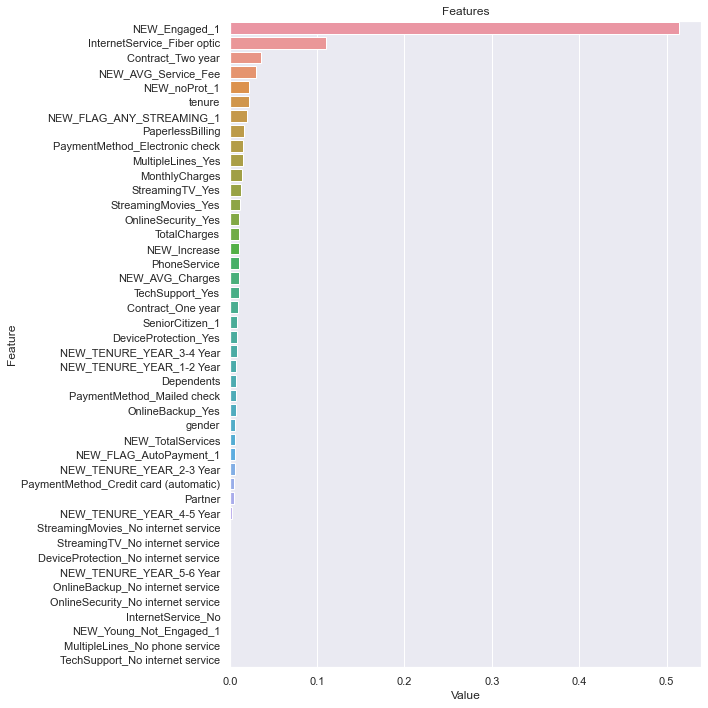

----------LGBM_Hyper_Param-----------


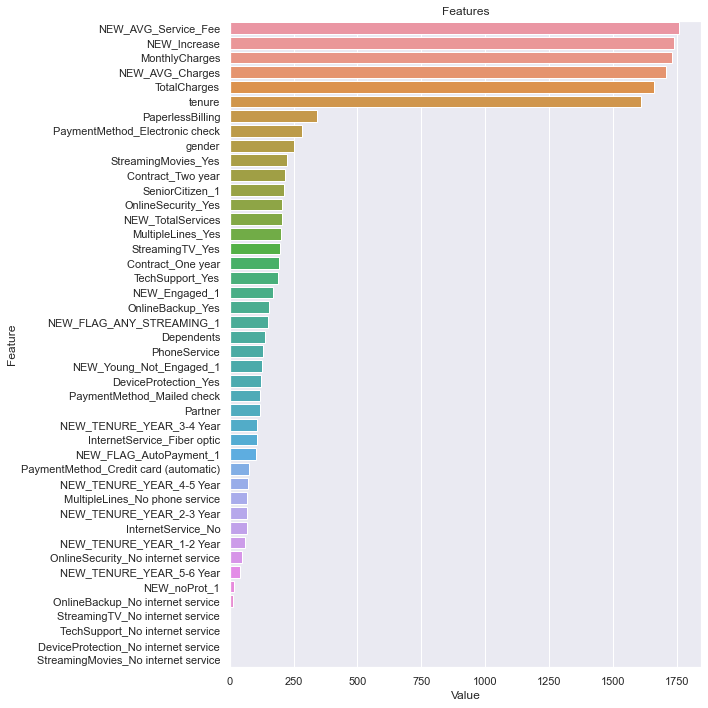

----------RF_Hyper_Param-----------


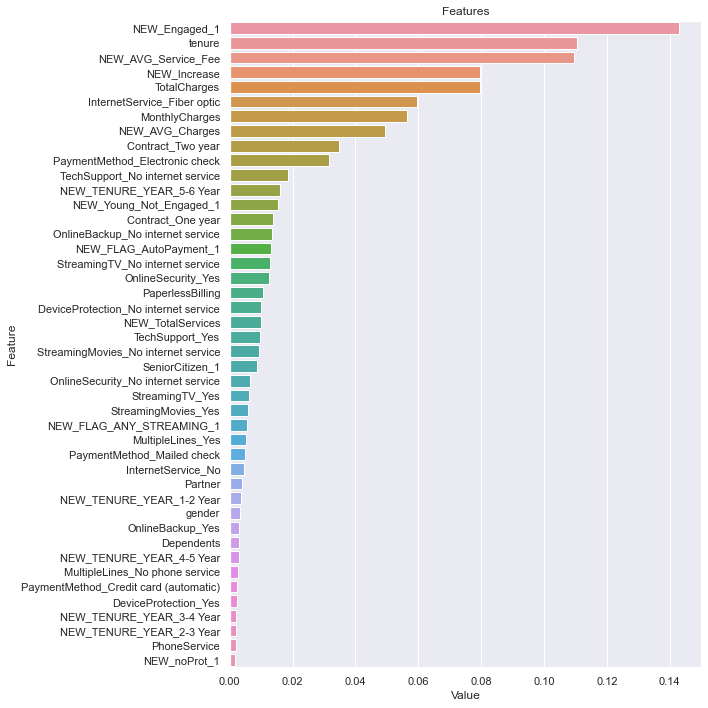

In [302]:
for name in final_models:
    print(f"----------{name}-----------")
    plot_importance(final_models[name], X)

# 4. Model Validation

Analyzing Model Complexity with Learning Curves

In [308]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)
    plt.figure(figsize=(5,5),dpi=100)
    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show()

In [310]:
xgboost_param = [["learning_rate", [0.1, 0.01, 0.001]],
                  ["max_depth", [5, 8, 12, 15, 20]],
                  ["n_estimators", [100, 500, 1000]],
                  ["colsample_bytree", [0.5, 0.7, 1]]]


rf_param = [["max_depth", [5, 8, None]],
             ["max_features", [3, 5, 7, "auto"]],
             ["min_samples_split", [2, 5, 8, 15, 20]],
             ["n_estimators", [100, 200, 500]]]

regressorss = [("XGBOOST_Hyper_Param", XGBClassifier(random_state=12345), xgboost_param),
              ('RF_Hyper_Param', RandomForestClassifier(random_state=12345), rf_param)]




#####################  XGBOOST_Hyper_Param  #####################


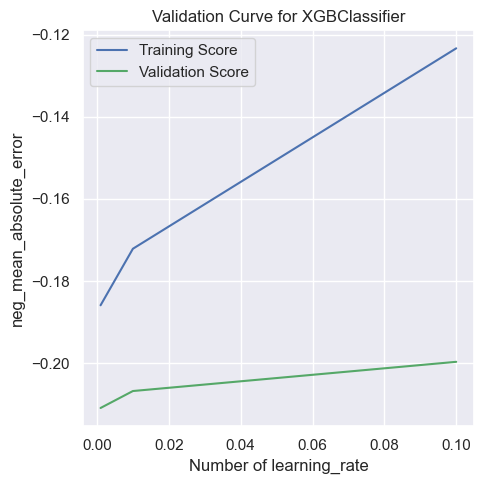

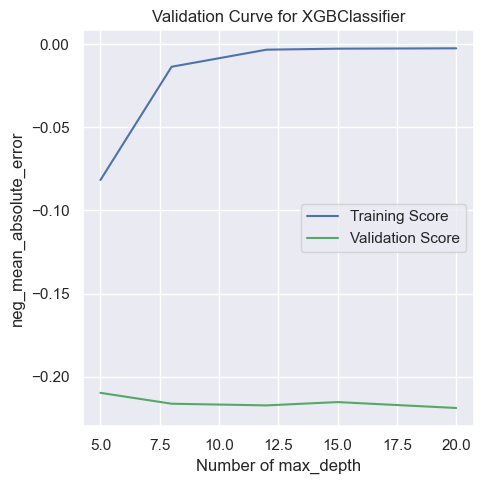

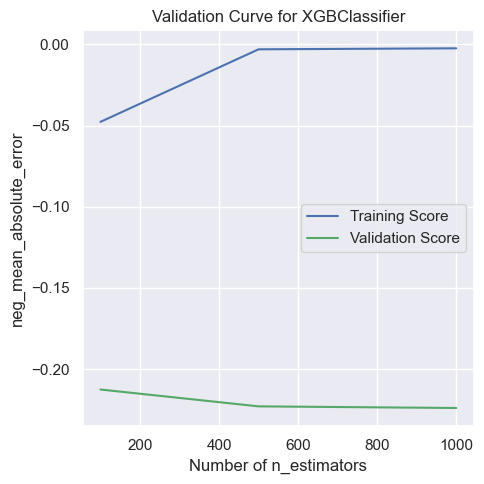

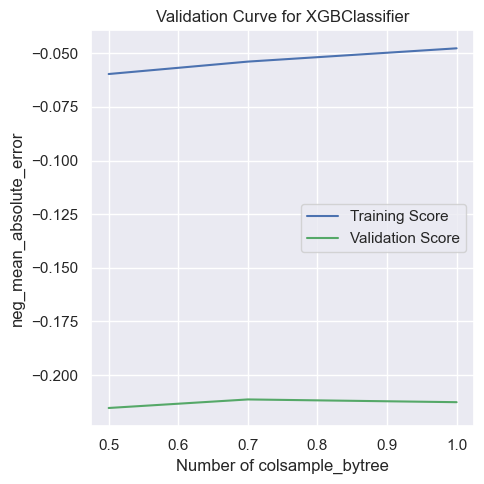

############################################################################
#####################  RF_Hyper_Param  #####################


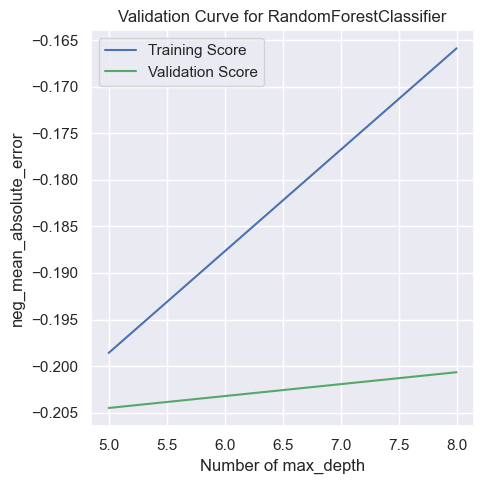

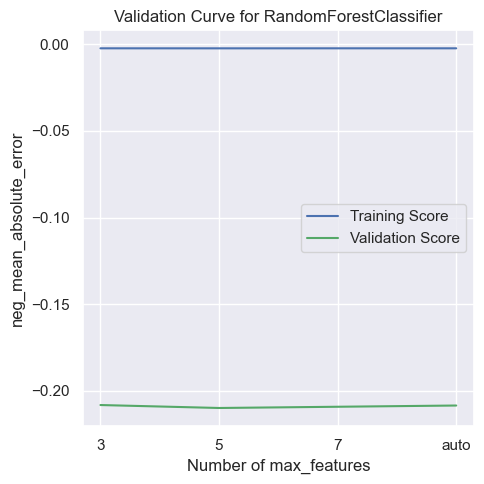

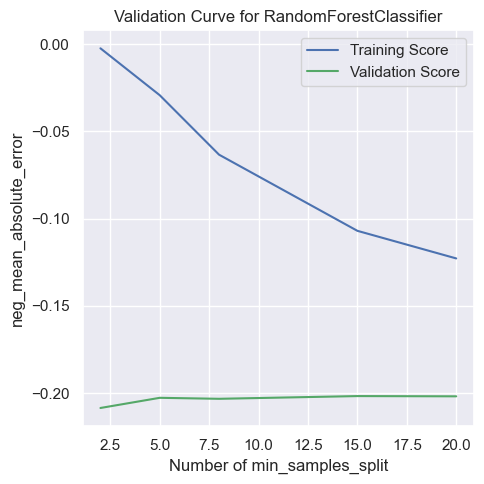

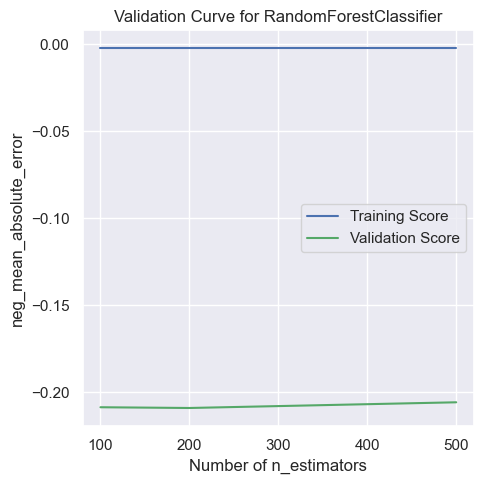

############################################################################


In [311]:
for Model_Name, model ,params in regressorss:
    print(f"#####################  {Model_Name}  #####################")
    for i in range(len(params)):
        val_curve_params(model, X, y, params[i][0], params[i][1],scoring="neg_mean_absolute_error")
    print("############################################################################")    

In [313]:
conclusion_df

,Accuracy,AUC,Recall,Precision,F1
Base_LR,0.802,0.843,0.540,0.655,0.592
Base_KNN,0.763,0.746,0.446,0.572,0.501
Base_CART,0.728,0.660,0.511,0.490,0.500
Base_RF,0.795,0.826,0.488,0.653,0.559
Base_SVM,0.769,0.714,0.290,0.649,0.401
Base_XGB,0.787,0.825,0.508,0.623,0.559
Base_LightGBM,0.796,0.837,0.517,0.647,0.574
LR,0.801,0.844,0.506,0.668,0.575
KNN,0.770,0.753,0.466,0.586,0.518
CART,0.726,0.656,0.501,0.485,0.493


# REPORTING

This project aims to develop a machine learning model that can predict the probability of customers leaving the company. Before the model is created, necessary data analysis and engineering steps will be taken.

## Stages conducted within the scope of the project:

### 1. Importing and Loading Phase:
- Required Libraries and Functions imported and dataset read

### 2. via Exploratory Data Analysis:
- The structural information of the data set was examined.
- Descriptive statistics of the data set were examined.
- The size information of the data set has been reached.
- The types of categorical and numerical variables in the data set were examined and visualized.
- Categorical and numerical variables were analyzed within themselves and by target variable.
- Correlation between variables observed and visualized.

### 3. In data preprocessing process:

- As a result of the outlier analysis, 0 variable with outliers were observed.
- As a result of missing value analysis, it was observed that 11 units were missing, approximately 0.16% of the observation units, in the variable "TotalCharges". These observation units were excluded from the project.
- During the feature exraction phase, 10 new variables were produced.
- Using One-Hot Encoding and Label Encoding techniques the data set was encoded to be ready for the use of machine learning algorithms.

### 4. In Model Building Phase:

- Firstly, with 7 classifier and regression techniques including LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier,
RandomForestClassifier, SVC, XGBClassifier, LGBMClassifier machine learning algorithms, base models were established and "accuracy", "f1", "roc_auc", "precision", "recall" scores were observed.
- Then, in the Model Tuning and Evaluation phase, the best hyperparameters were reached by using the GridSearchCV technique.
- In the Feature Importance stage, the effects of each variable on the model was calculated and visualized, specific to various machine learning algorithms.

### 5. In Model Validation Phase:

- Model Complexity was analyzed using Learning Curves in terms of Random Forest and XGBOOST algorithms and their optimized parameters.

# Conclusion:

After all the analysis, data preprocessing, feature engineering, modeling and optimization stages on the data set, 

The Base Linear Regression (Base_LR) model stands out with high accuracy (0.802) and area under the curve (AUC) value (0.843). It also provides moderate recall (0.540) and precision (0.655). The F1 score is calculated as 0.592.

Base_KNN and Base_CART models exhibit lower recall and F1 score as base models. However, they can be preferred in cases where low computational cost is required.

Optimized models (Hyper_Param) generally outperform the base models. Especially, the LGBM_Hyper_Param model shines with high accuracy (0.803) and AUC (0.845) values.

In conclusion, we emphasize the importance of choosing a model depending on specific criteria or usage scenarios. Model selection should consider both the requirements of the workload and performance metrics.

This study lays a foundation for future research while indicating that further improvements, such as more hyperparameter tuning and feature engineering, could further enhance performance.